<a href="https://colab.research.google.com/github/TrollRider-Kristian/Springboard-AI-Mini-Projects/blob/main/Student_MLE_MiniProject_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [51]:
# Load data and split into feature and target variables via setting the return_X_y parameter to True.
(breast_cancer_features, breast_cancer_targets) = load_breast_cancer(return_X_y=True, as_frame = True)

In [55]:
# View first 5 rows of the data (features and target printed separately below)
print (breast_cancer_features.head())
print (breast_cancer_targets.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

Summing up the 1's on the target vectors gives a total of 357 total positive diagnoses of breast cancer.  Dividing that number by the total number of rows yields a positive diagnosis frequency of 62.7%.

In [56]:
# How frequently does the positive target occur?
# print (breast_cancer_features.isnull().sum()) # Horray! No null values in any of the rows for our breast_cancer dataset.  Data is complete.
print (breast_cancer_targets.sum()) # As a quantity
print (breast_cancer_targets.sum() / len (breast_cancer_targets)) # As a ratio to total number of targets

357
0.6274165202108963


In [57]:
# Generate summary statistics for the data
breast_cancer_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In short, the answer is yes: the assumption about multicollinearity is broken because there is plenty of it to be found among our features.

Wikipedia defines multicollinearity as a high correlation between a pair of features (https://en.wikipedia.org/wiki/Multicollinearity).  Looking at the pairplot for the first five variables, I immediately noticed a near-perfect correlation between the 'mean radius' and the 'mean perimeter' of a patient's cells (it looks almost like a straight line of slope 1).  There is another very strong correlation beteween 'mean radius' and 'mean area' and also between 'mean perimeter' and 'mean area'.  There is a moderate positive correlation between 'mean radius' and 'mean concavity' too, per the pairplot.

The correlation heatmap backs up these findings with positive correlations almost equal to 1 between 'mean radius' and five other features: 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter', and 'worst area'.

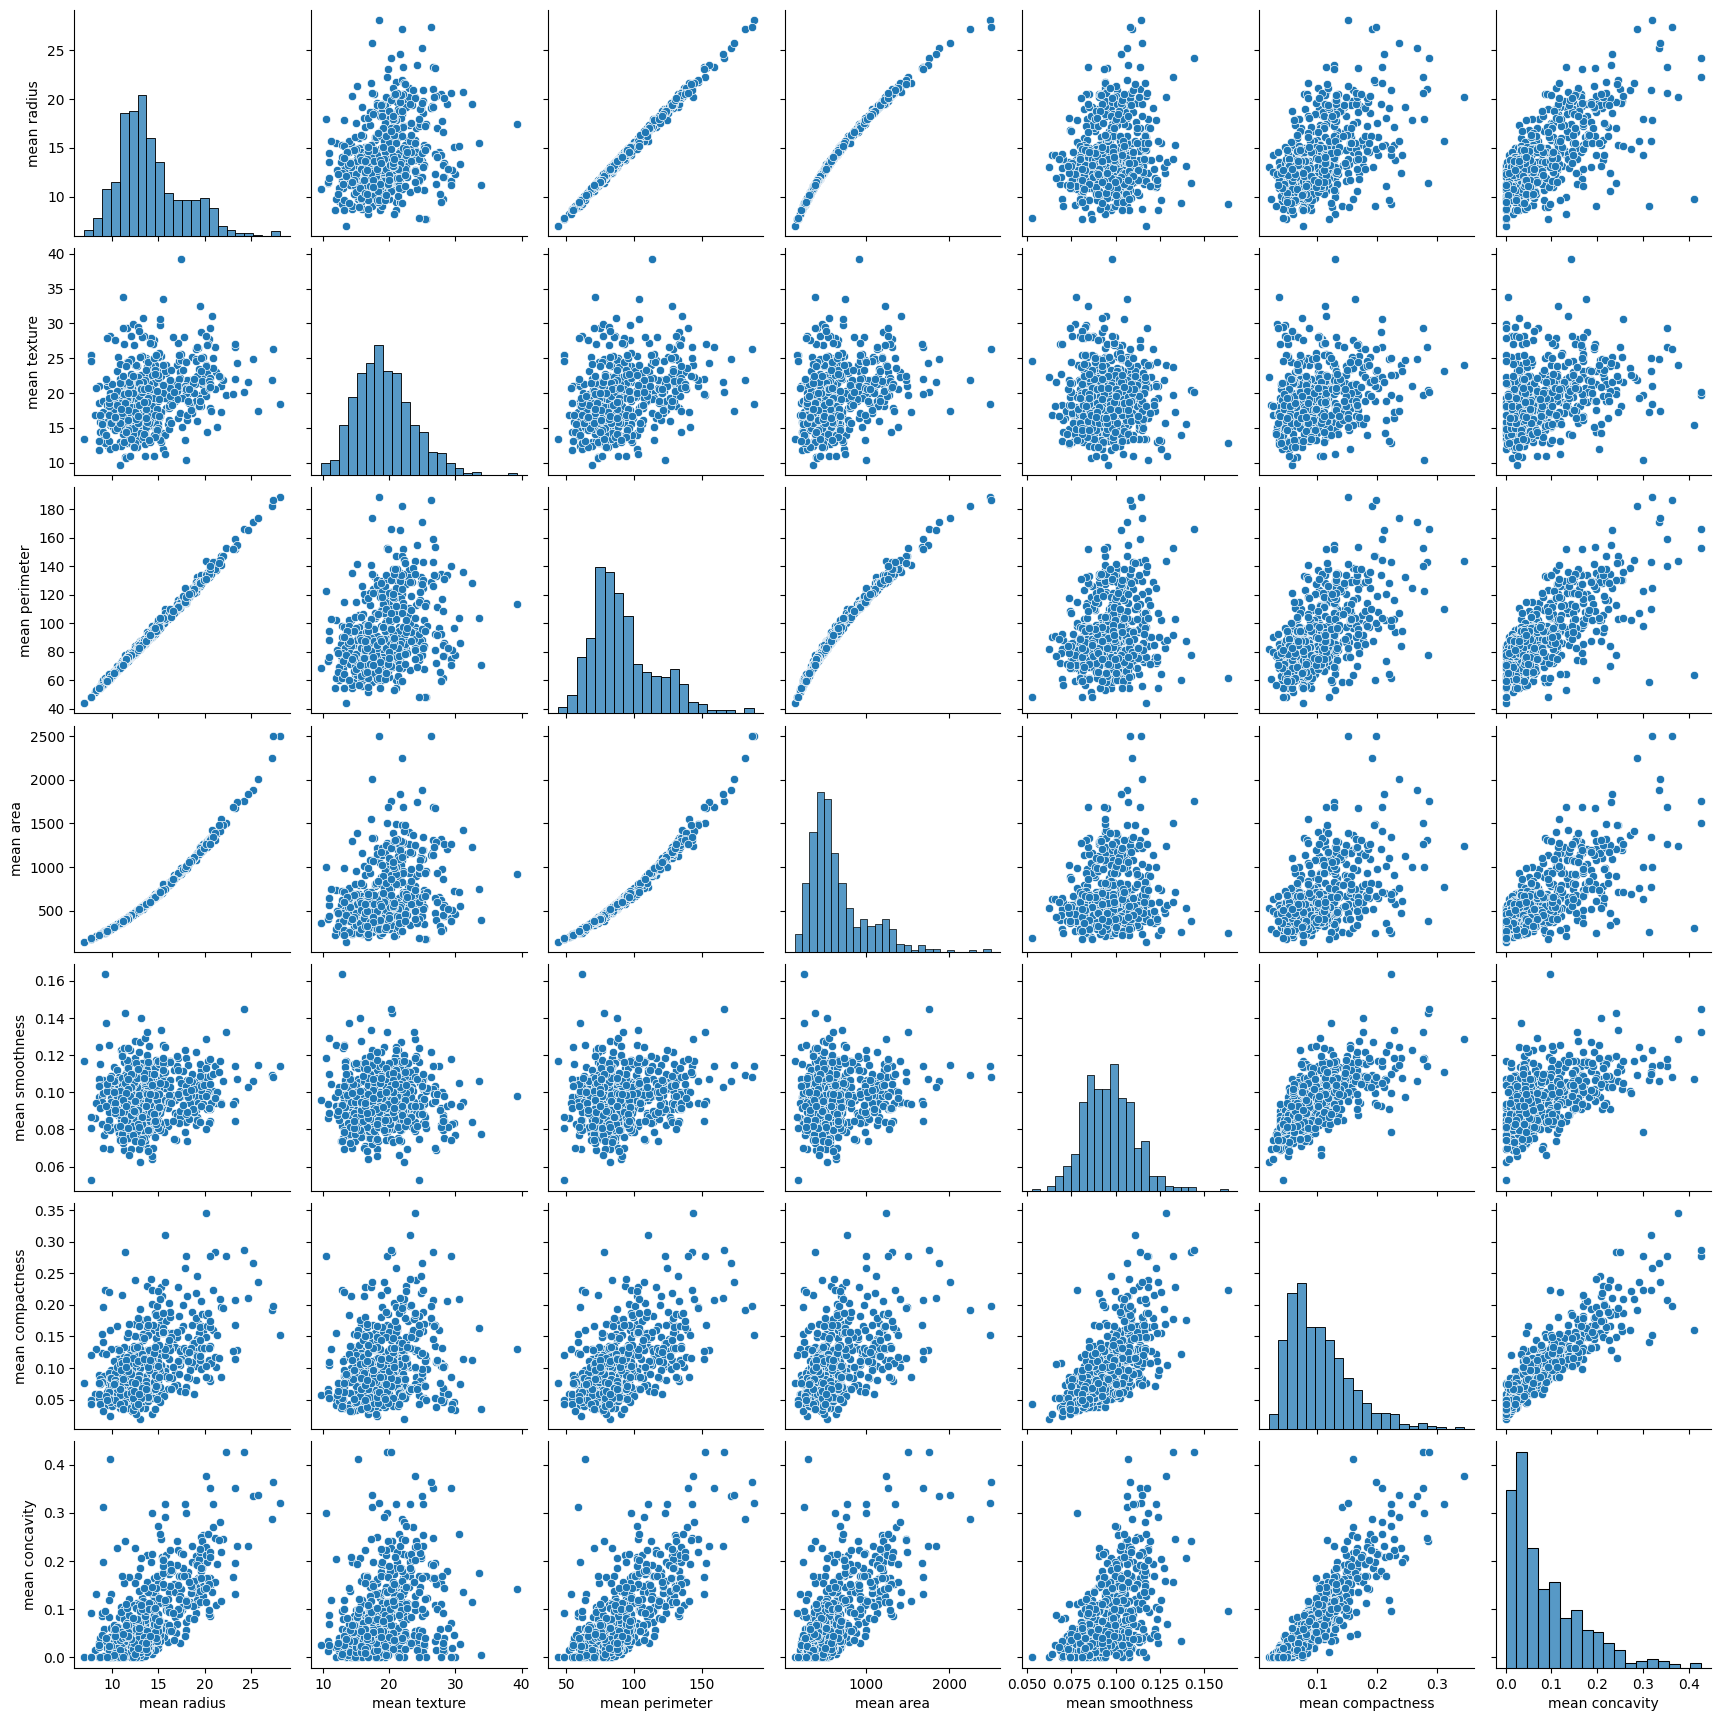

In [58]:
# Create a pairplot for the first few features
# Decided to go with the first seven variables, since they are all related to 'mean' values.  For 'error' and 'worst' type values, please see the heatmap below this pairplot.
sns.pairplot (data = breast_cancer_features, kind = 'scatter',\
  x_vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity'],\
  y_vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity']\
)

<Axes: >

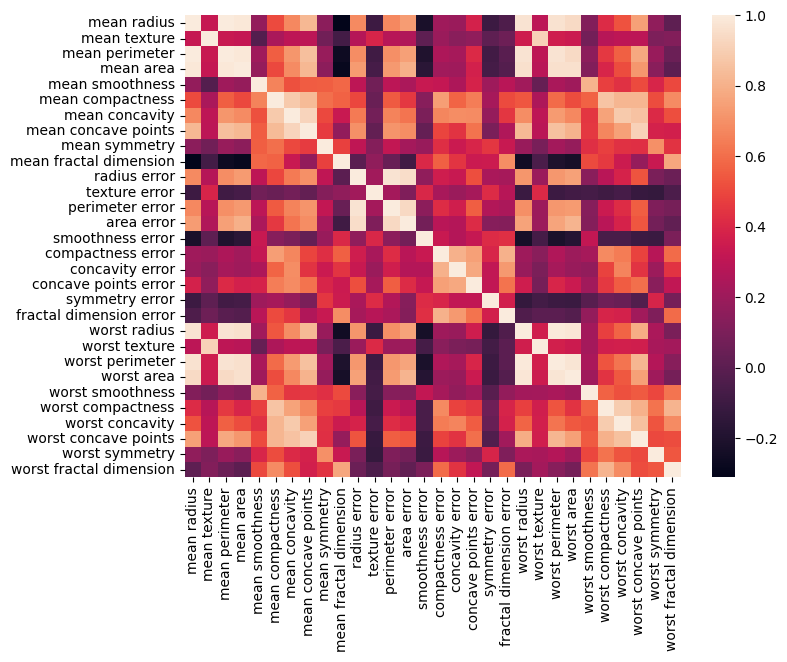

In [59]:
# Create a correlation coefficient heatmap
# Use plt.figure to enlarge the heatmap so that all the features are visible on the axes using the method here:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
plt.figure (figsize = (8, 6))
sns.heatmap (data = breast_cancer_features.corr())

The boxplot below confirms a negative correlation between the mean radius of the nucleus cells and a positive breast cancer diagnosis.  Also, the mean radius of a patient's cell nuclei has a smaller distribution for patients who received a positive diagnosis than patients who received a negative diagnosis.

<Axes: xlabel='mean radius'>

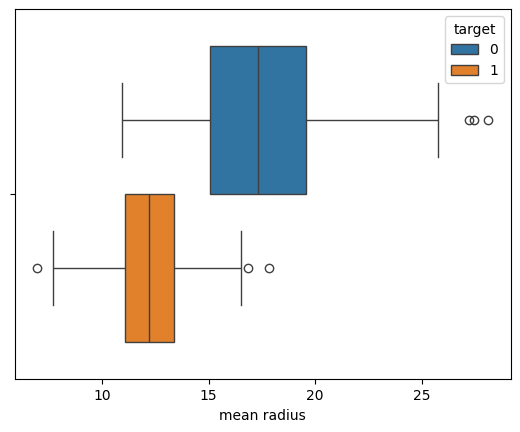

In [60]:
# Create a boxplot for mean radius by target type
breast_cancer_radius_and_target = pd.concat([breast_cancer_features.loc[:, ['mean radius']], breast_cancer_targets], axis=1)
# print (breast_cancer_radius_and_target.head())
sns.boxplot (data = breast_cancer_radius_and_target, x = 'mean radius', hue = 'target')

It behooves the developer to create another boxplot with data for a few other features *not* strongly correlated with 'mean radius'.  The developer has chosen 'mean texture', 'mean smoothness', 'mean symmetry', and 'mean fractal dimension'.

According to the Wisconsin Breast Cancer research paper that started this dataset:

https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=CCFCB650744F075F4FF760C09D646050?sequence=1

the 'mean texture' is measured as the "variance in the greyscale intensities" of the nuclei of the patient's cells.

In patients with a negative cancer diagnosis, the cells have a significantly greater texture on average with overlap occurring in the outliers of patients with a positive diagnosis.  One speculation is that they caught the malignant tumors in the early stages, so their cell textures are still mostly intact?

<Axes: xlabel='mean texture'>

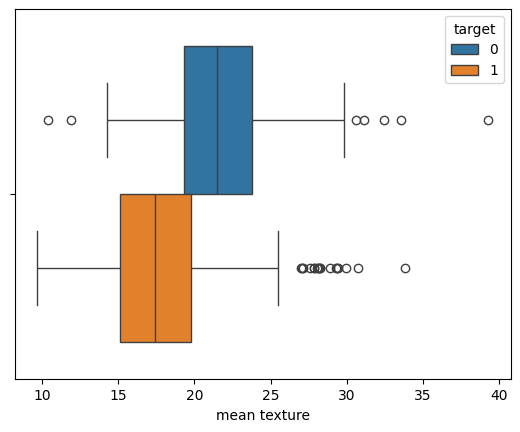

In [61]:
# Create another boxplot for mean texture by target type
breast_cancer_texture_and_target = pd.concat([breast_cancer_features.loc[:, ['mean texture']], breast_cancer_targets], axis=1)
# print (breast_cancer_texture_and_target.head())
sns.boxplot (data = breast_cancer_texture_and_target, x = 'mean texture', hue = 'target')

Per this boxplot, there is little difference in 'mean smoothness' between patients with a positive breast cancer diagnosis and patients with a negative diagnosis, save for a slight decrease in 'mean smoothness' for the cells of an average cancer patient.

<Axes: xlabel='mean smoothness'>

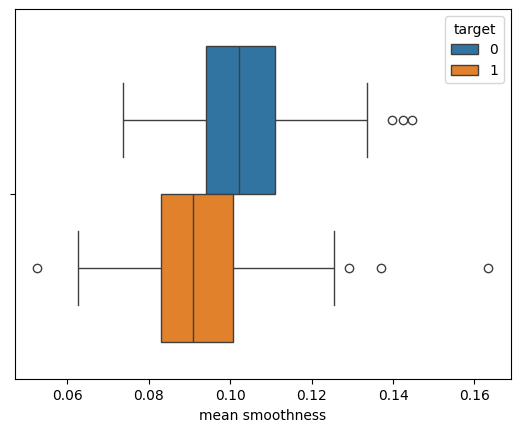

In [62]:
# Create another boxplot for mean smoothness by target type
breast_cancer_smoothness_and_target = pd.concat([breast_cancer_features.loc[:, ['mean smoothness']], breast_cancer_targets], axis=1)
# print (breast_cancer_smoothness_and_target.head())
sns.boxplot (data = breast_cancer_smoothness_and_target, x = 'mean smoothness', hue = 'target')

Same findings for 'mean smoothness' also apply for 'mean symmetry'.

<Axes: xlabel='mean symmetry'>

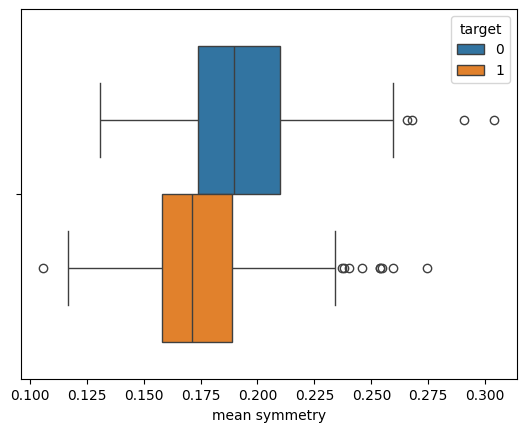

In [63]:
# Create another boxplot for mean symmetry by target type
breast_cancer_symmetry_and_target = pd.concat([breast_cancer_features.loc[:, ['mean symmetry']], breast_cancer_targets], axis=1)
# print (breast_cancer_symmetry_and_target.head())
sns.boxplot (data = breast_cancer_symmetry_and_target, x = 'mean symmetry', hue = 'target')

The average 'mean fractal dimension' of a patient's cells is roughly the same between those with a positive breast cancer diagnosis and those with a negative diagnosis.  However, the distribution of 'mean fractal dimension' data points is much smaller among patients with a positive diagnosis.

<Axes: xlabel='mean fractal dimension'>

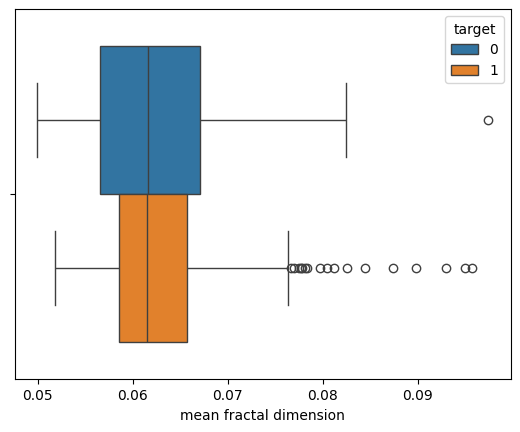

In [64]:
# Create another boxplot for mean fractal dimension by target type
breast_cancer_fractal_dimension_and_target = pd.concat([breast_cancer_features.loc[:, ['mean fractal dimension']], breast_cancer_targets], axis=1)
# print (breast_cancer_fractal_dimension_and_target.head())
sns.boxplot (data = breast_cancer_fractal_dimension_and_target, x = 'mean fractal dimension', hue = 'target')

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [65]:
# Split data into training and test sets.
# Pass an integer for the random_state argument to ensure the data gets shuffled and split in the same way after every run of this function
# So that we consistently reproduce and score the same model.
features_train, features_test, targets_train, targets_test = train_test_split (breast_cancer_features, breast_cancer_targets, random_state = 1)

In [66]:
# Build and train logistic regression model
# Scale the breast cancer data before feeding it to the logistic regression algorithm as suggested by Madecraft and Michael Galarnyk:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std = True) # Note that with_std = True means we scale by the standard deviation of the values to which we fit the scaler.
scaler.fit (features_train.values) # In this case, it's the training set.
scaled_features_train = scaler.transform (features_train.values)
scaled_features_test = scaler.transform (features_test.values)

breast_cancer_classifier = LogisticRegression(solver = 'liblinear')
breast_cancer_classifier.fit(scaled_features_train, targets_train.values)

LogisticRegression(solver='liblinear')

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [67]:
# Evaluate the model
predicted_targets = breast_cancer_classifier.predict (scaled_features_test)

# Overall accuracy to print, commented out for reference
# print (breast_cancer_classifier.score(scaled_features_test, targets_test)) # 97.9% accuracy

According to the confusion matrix below, there are a total of 143 breast cancer diagnoses.  53 were true positives and 87 were true negatives (140 correct predictions).  There were 2 false negatives and 1 false positive.  Diving 140 by 143 yields the same 97.9% accuracy that is returned by the 'score' method printed out below my 'predict' method call.

In [71]:
# Generate a confusion matrix
print (confusion_matrix (targets_test, predicted_targets))

[[53  2]
 [ 1 87]]


The first two rows provide the statistics for patients who received a positive diagnosis and patients who received a negative diagnosis, respectively.  Using the definitions for precision, recall, and f1-score given above, we'll explain the results for the rows mean:

1. Precision measures the percentage of diagnosed patients who actually have the result.  Roughly 98% of patients who received a negative diagnosis were, in reality, cancer-free.  Roughly 98% of patients who recieved a positive diagnosis actually had breast cancer.

2. Recall measures the percentage of patients with an actual result who were correctly diagnosed. According to the *first row*,  roughly 96% (53 / (53 + 2), per the confusion matrix above) of patients who are cancer-free received a negative diagnosis. For the *second row*, roughly 99% (87 / (87 + 1), per the confusion matrix above) of patients who actually have breast cancer recieved a positive diagnosis.

The difference between precision and recall is that precision measures a ratio of "*actual AND diagnosed* (TP)" to "*ALL diagnosed* (TP + FP)" patients while recall measures a ratio of "*actual AND diagnosed* (TP)" to "*ALL actual* (TP + FN)".

3. The f1-score is 97-98% for all rows because precision and recall are close together.

4. Support measures the total number of patients by diagnosis.  We have 55 patients with a positive diagnosis and 88 with a negative diagnosis.

The last three rows denote total accuracy (98% of patients received a correct diagnosis), average statistics for ALL patients (98% precision, 98% recall, and an f1-score of 98% for ALL patients), and weighted average statistics to account for an unequal number of positively diagnosed and negatively diagnosed patients.

In [74]:
# Generate a classification report
print (classification_report (targets_test, predicted_targets, target_names = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.98      0.96      0.97        55
    negative       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [75]:
# Extract coefficients
# Fortunately, they're an attribute of the model itself: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
feature_importances = breast_cancer_classifier.coef_
# print (feature_importances) # Uncomment to see the array of coefficients
# print (features_train.describe()) # Uncomment to see the mean and standard deviation of the training set for comparison against the normalized feature coefficients below.

In [76]:
# Normalize the coefficients by the standard deviation
# Reuse the same StandardScaler fitted to the training set for our Logistic Regression model upon the feature coefficients.
# Note that the StandardScaler constructor specifies with_std = True, and we already fitted the scaler to the training set.
# See the docs for reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# No need to fit the scaler again.
scaled_feature_importances = scaler.transform (feature_importances)
# print (scaled_feature_importances) # Uncomment to see the scaled coefficients

In [77]:
# Sort feature names and coefficients by absolute value of coefficients

# Pair up the feature coefficients with the features before sorting so they appear correctly in the bar graph below.
# Also, note that the scaler gave back a 2D list, so we need to zip up index 0 of the outer list.
# Zip up the columns and coefficients and convert to a dictionary using the following article as a guide:
# https://stackoverflow.com/questions/22614980/python-convert-pairs-list-to-dictionary
feature_name_importance_pair = dict (zip (breast_cancer_features.columns, scaled_feature_importances[0] ))
# print (feature_name_importance_pair)

# Use the sorted method to pass abs as a comparator for each dictionary value: https://docs.python.org/3/howto/sorting.html
sorted_feature_importances = dict(sorted (feature_name_importance_pair.items(), key = lambda pair: abs(pair[1])))
# print (sorted_feature_importances)

According to the bar graph below, the most important predictor of cancer in this dataset is the 'fractal dimension error'.

<BarContainer object of 30 artists>

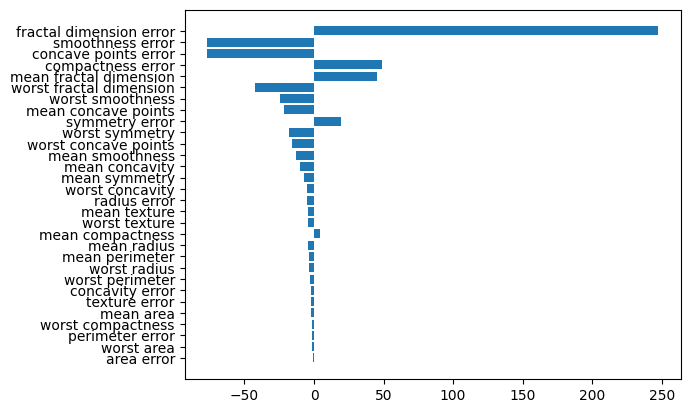

In [78]:
# Visualize feature importances
plt.barh (list(sorted_feature_importances.keys()), list(sorted_feature_importances.values()))

The model measured cancer in a set of several hundred patients with 98% accuracy.  This was fantastic progress for 1992 (the year of the paper's publication), but far from ready to deploy to a working hospital.

The model's main strength is that 30 features feels high enough to feel comprehensive but low enough to still look good in a series of visualizations, such as the barplot above.  However, some of these features feel somewhat derivative of others.  A cell nucleus comes off as circular, and the paper for our dataset suggests the features were measured off of 2D images.

Take the first row of data as an example.  The 'mean radius' is 17.99 and the 'mean perimeter' is 122.8, but the circumference of a circle with a radius of 17.99 is around 2 x PI x radius, or 113.03.  The 'mean area' is 1001.0, but the area of a circle with radius 17.99 is PI x radius x radius, or about 1016.75.  The values compared are not identical, but close enough to explain some of the multicollinearity appearing in my heatmap and pairplot.  I am not enough of a medical expert to recommend specific features, but diversifying the feature space *and* ensuring their low correlation to existing features will create a more accurate model.

Speaking of accuracy, it still needs to be even higher before we let this model loose in the real world.  Imagine a human cancer specialist getting a diagnosis wrong for 2 out of every 100 patients; the poor doctor would be out of business quickly and likely get sued.  I understand the constraints of those researchers, but we can definitely add more patients now.  PC's had memory constraints for most of their history (my parents' Windows 98 PC had a 6-gigabyte hard drive compared to the 900-gigabyte laptop I have now), so I believe 569 patients was the best they could do at the time.  But in 2025, laptops can handle models consisting of thousands or even tens of thousands of patients with little to no change in performance.  More data improves accuracy.